In [1]:
import numpy as np
import random
import tqdm

## Load the Stories
#### lack of resources I'm unable to work with whole stories so choose 4000 Random stories.

In [2]:
from os import listdir
 
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
 
# split a document into news story and highlights
def split_story(doc):
    # find first highlight
    index = doc.find('@highlight')
    # split into story and highlights
    story, highlights = doc[:index], doc[index:].split('@highlight')
    # strip extra white space around each highlight
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights
 
# load all stories in a directory
def load_stories(directory):
    stories = list()
    for  name in tqdm.tqdm(random.sample(listdir(directory), 4000)):
        filename = directory + '/' + name
        # load document
        doc = load_doc(filename)
        # split into story and highlights
        story, highlights = split_story(doc)
        # store
        stories.append({'story':story, 'highlights':highlights})
    return stories
 
# load stories
directory = 'C:/Users/User/Downloads/cnn/stories/'
stories = load_stories(directory)
# print('Loaded Stories %d' % len(stories))

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [02:53<00:00, 23.03it/s]


In [4]:
storys=[]
for dicti in stories:
    storys.append(dicti['story'])
    
storys[0], len(storys)

('(CNN) -- A wind-fed fire in southern Arizona grew dramatically Friday, racing down from canyons and gobbling parched grasslands and brush.\n\nArizona and New Mexico were under red-flag alerts through the weekend as firefighters battled several blazes in Arizona.\n\nConditions will be especially difficult Sunday at the Monument fire just south of Sierra Vista, Arizona, according to Glenn Lader of the National Weather Service office in Tucson.\n\nRelentless winds have spread the 18,580-acre fire that has torched at least 40 homes and forced the evacuation of hundreds Thursday. Evacuations of several areas continued Friday.\n\nThe Monument fire has spread across the Huachuca Mountains near the Mexican border.\n\nThe area is known as the "Sky Islands" region.\n\n"These mountain \'islands,\' forested ranges separated by vast expanses of desert and grassland plains, are among the most diverse ecosystems in the world," according to the Sky Island Alliance, a conservation group.\n\nGarry Fos

In [5]:
'''
Cleaning and Preprocessing of the data
'''

# importing required libraries 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

doc_complete = storys
doc_clean = [word_tokenize(doc) for doc in doc_complete]    


# print('\n\nCleaned Data\n\n')
# print(doc_clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
import gensim
##  Build the bigram and trigram models
bigram = gensim.models.Phrases(doc_clean, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[doc_clean], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[doc_clean[0]]]) 

In [7]:
from gensim.utils import simple_preprocess
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(doc_clean)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

In [10]:
# save to file
from pickle import dump
dump(data_lemmatized, open('Assignment_Problem_Cleane_cnn_dataset.pkl', 'wb'))

In [11]:
# Importing Gensim
import gensim
from gensim import corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])

In [12]:
import pickle
pickle.dump(corpus, open("Assignment_problem_Corpus.pkl", "wb"))
id2word.save("Assignment_problem_Dictionary.gensim")

In [13]:
### Human readable format of corpus (term-frequency)
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accord', 3),
  ('acre', 3),
  ('add', 1),
  ('alert', 1),
  ('also', 1),
  ('area', 2),
  ('authority', 1),
  ('battle', 2),
  ('become', 1),
  ('behavior', 1),
  ('blaze', 3),
  ('border', 1),
  ('burn', 1),
  ('canyon', 1),
  ('close', 1),
  ('compare', 1),
  ('condition', 1),
  ('conifer', 1),
  ('contain', 1),
  ('continue', 1),
  ('contribute', 1),
  ('could', 2),
  ('county', 1),
  ('couple', 1),
  ('create', 1),
  ('crew', 2),
  ('day', 1),
  ('declaration', 1),
  ('desert', 1),
  ('difficult', 1),
  ('diverse', 1),
  ('dramatically', 1),
  ('drought', 1),
  ('dry', 2),
  ('ecosystem', 1),
  ('eligible', 1),
  ('emergency', 1),
  ('especially', 1),
  ('evacuation', 2),
  ('expanse', 1),
  ('expense', 1),
  ('extreme', 2),
  ('face', 1),
  ('fire', 12),
  ('firefighter', 1),
  ('foot', 1),
  ('force', 1),
  ('forecast', 1),
  ('forest', 2),
  ('fuel', 2),
  ('gobble', 1),
  ('grass', 1),
  ('grassland', 1),
  ('grow', 1),
  ('happen', 1),
  ('heavy', 1),
  ('high', 2),
  ('hi

In [31]:
## Running and Trainign LDA model on the document term matrix.

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=20,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [37]:
lda_model.save("Assignment_Problem_model6.gensim")

In [32]:
# Print the Keyword in the 10 topics
for i in lda_model.print_topics():
    print(i)

(0, '0.018*"go" + 0.016*"say" + 0.015*"make" + 0.013*"would" + 0.013*"time" + 0.012*"year" + 0.012*"get" + 0.012*"people" + 0.010*"think" + 0.010*"come"')
(1, '0.020*"say" + 0.013*"family" + 0.013*"child" + 0.011*"show" + 0.009*"find" + 0.008*"friend" + 0.007*"school" + 0.007*"student" + 0.007*"life" + 0.007*"old"')
(2, '0.012*"use" + 0.009*"new" + 0.009*"company" + 0.007*"system" + 0.006*"also" + 0.006*"may" + 0.005*"include" + 0.005*"high" + 0.005*"program" + 0.005*"market"')
(3, '0.060*"say" + 0.011*"government" + 0.010*"report" + 0.010*"official" + 0.008*"tell" + 0.008*"police" + 0.008*"people" + 0.007*"attack" + 0.007*"country" + 0.007*"would"')
(4, '0.011*"second" + 0.011*"vote" + 0.011*"last" + 0.011*"game" + 0.011*"year" + 0.011*"play" + 0.010*"player" + 0.010*"final" + 0.008*"team" + 0.008*"season"')
(5, '0.040*"say" + 0.012*"water" + 0.011*"area" + 0.009*"city" + 0.008*"passenger" + 0.008*"flight" + 0.007*"report" + 0.007*"people" + 0.006*"day" + 0.006*"plane"')


In [33]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.157006123511644

Coherence Score:  0.40459541941785776


In [34]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.005015 -0.099234       1        1  27.532097
3     -0.058385  0.033122       2        1  25.751925
1      0.092599  0.198580       3        1  14.565584
2     -0.289155 -0.114691       4        1  14.344448
5      0.011543  0.192931       5        1   8.968449
4      0.248412 -0.210708       6        1   8.837502, topic_info=          Term          Freq         Total Category  logprob  loglift
105        say  26821.000000  26821.000000  Default  30.0000  30.0000
200         go   5247.000000   5247.000000  Default  29.0000  29.0000
381        get   3405.000000   3405.000000  Default  28.0000  28.0000
831      think   2810.000000   2810.000000  Default  27.0000  27.0000
588     family   2293.000000   2293.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
223       lead    509.201294   1532.335938   Topic6  -5.1668   1.3245
273        set    497.717072   1540.690308   Topic6  -5.1897   1.2962
4         also    517.122681   4586.102539   Topic6  -5.1514   0.2437
440  political    440.610657    918.145020   Topic6  -5.3115   1.6920
508       time    447.144073   4342.244629   Topic6  -5.2968   0.1529

[381 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
533       5  0.994599  accident
0         2  0.654984    accord
0         3  0.009524    accord
0         4  0.158251    accord
0         5  0.176934    accord
...     ...       ...       ...
137       3  0.094899      year
137       4  0.078787      year
137       6  0.140427      year
1103      1  0.538595     young
1103      3  0.460929     young

[632 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 6, 5])

## Having analysis the Visualization we can say 
Topic_0           Related to ------>>> Social -----------

Topic_ 1         --------- --------- investigate  ----------

Topic_2  ------------------------- Artistic ----------

Topic_3 -------------------------- Enterprise ---------

Topic_4 -------------------------- Realistic -----------

Topic_5 -------------=-- --------- Conventional -------- 

In [40]:
from os import listdir
 
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
 
# split a document into news story and highlights
def split_story(doc):
    # find first highlight
    index = doc.find('@highlight')
    # split into story and highlights
    story, highlights = doc[:index], doc[index:].split('@highlight')
    # strip extra white space around each highlight
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights
 
# load all stories in a directory
def load_stories(directory):
    stories = list()
    for  name in tqdm.tqdm(listdir(directory)):
        filename = directory + '/' + name
        # load document
        doc = load_doc(filename)
        # split into story and highlights
        story, highlights = split_story(doc)
        # store
        stories.append({'story':story, 'highlights':highlights})
    return stories
 
# load stories
directory = 'C:/Users/User/Downloads/cnn/stories/'
stories = load_stories(directory)

100%|██████████████████████████████████████████████████████████████████████████| 92579/92579 [1:20:02<00:00, 19.28it/s]


In [38]:
import pandas as pd

In [42]:
cnn_df = pd.DataFrame(stories)
cnn_df.head()

,story,highlights
0,It's official: U.S. President Barack Obama wan...,[Syrian official: Obama climbed to the top of ...
1,(CNN) -- Usain Bolt rounded off the world cham...,[Usain Bolt wins third gold of world champions...
2,"Kansas City, Missouri (CNN) -- The General Ser...",[The employee in agency's Kansas City office i...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,[NEW: A Canadian doctor says she was part of a...
4,(CNN) -- Police arrested another teen Thursday...,[Another arrest made in gang rape outside Cali...


In [46]:
cnn_df.highlights[2]

['The employee in agency\'s Kansas City office is among hundreds of "virtual" workers',
 "The employee's travel to and from the mainland U.S. last year cost more than $24,000",
 'The telecommuting program, like all GSA practices, is under review']

In [48]:
cnn_df.story[0]

'It\'s official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria.\n\nObama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons.\n\nThe proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."\n\nIt\'s a step that is set to turn an international crisis into a fierce domestic political battle.\n\nThere are key questions looming over the debate: What did U.N. weapons inspectors find in Syria? What happens if Congress votes no? And how will the Syrian government react?\n\nIn a televised address from the White House Rose Garden earlier Saturday, the president said he would take his case to Congress, not because he has to -- but 

In [57]:
def clean_lines(lines):
    cleaned = list()
    # prepare a translation table to remove punctuation
    table = str.maketrans('', '', string.punctuation)
    for line in lines:
        # strip source cnn office if it exists
        index = line.find('(CNN) -- ')
        if index > -1:
            line = line[index+len('(CNN)'):]
        # tokenize on white space
        line = line.split()
        # convert to lower case
        line = [word.lower() for word in line]
        # remove punctuation from each token
        line = [w.translate(table) for w in line]
        # remove tokens with numbers in them
        line = [word for word in line if word.isalpha()]
        # store as string
        cleaned.append(' '.join(line))
    # remove empty strings
    cleaned = [c for c in cleaned if len(c) > 0]
    return cleaned

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [180]:
dictionary = corpora.Dictionary.load("Assignment_problem_Dictionary.gensim")
model_load = gensim.models.ldamodel.LdaModel.load("Assignment_Problem_model6.gensim")


In [229]:
def sentance_to_topic(df, dictionary, model,):
    Topic_df = pd.DataFrame(columns= ["Sentence", "Topic"])
    for Row_index in range(len(df)):
#         print(Row_index)
        Clean_text = clean_lines(cnn_df.story[Row_index].split("\n"))
#         print("Length of Clean Text: --", len(Clean_text))
        if len(Clean_text) == 0:
            continue
        tokens = remove_stopwords(Clean_text)

        Corpus = [dictionary.doc2bow(token) for token in tokens]
        doc_lda = model[Corpus]

        lda = []
        Topic = []
        for i in doc_lda:
            lda.append(i[0])
        #     print(lda)
        #     print("------------",max(i[0], key = lambda x : x[1] )[0])
            Topic.append(max(i[0], key = lambda x : x[1] )[0])

        df = pd.DataFrame({"Sentence" : Clean_text, "Topic": Topic})
#         print("Length of Df : ----", len(df))
        
        Topic_df = Topic_df.append(df, ignore_index=True,)
        if len(Topic_df) > 100000:
            break
#         print("Length of ,main Df : -------",len(Topic_df))
    return Topic_df

In [230]:
Topic_df = sentance_to_topic(cnn_df, dictionary=dictionary, model=model_load)

In [231]:
Topic_df.to_csv('SentenceTopics.csv') 

In [232]:
len(Topic_df)

100020

In [241]:
Topic_df.head()

,Sentence,Topic
0,its official us president barack obama wants l...,3
1,obama sent a letter to the heads of the house ...,3
2,the proposed legislation from obama asks congr...,3
3,its a step that is set to turn an internationa...,3
4,there are key questions looming over the debat...,3


Text(0.5, 1.0, 'Count of instances ')

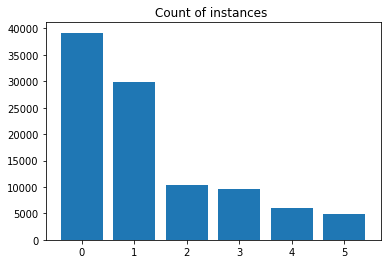

In [271]:
plt.bar([0,1,2,3,4,5], Topic_df.Topic.value_counts(), )
plt.title("Count of instances ")

In [254]:
topics = Topic_df.Topic.tolist()
type(topics)

list

In [255]:
Topic_Name = []
for topic in topics:
    if topic == 0:
        Topic_Name.append("Social")
    elif topic == 1:
        Topic_Name.append("investigate")
    elif topic == 2:
        Topic_Name.append("Artistic")
    elif topic == 3:
        Topic_Name.append("Enterprise")
    elif topic == 4:
        Topic_Name.append("Realistic")
    else : 
        Topic_Name.append("Conventional")

In [257]:
Topic_df["Topic_Name"] = Topic_Name
Topic_df.head()

,Sentence,Topic,Topic_Name
0,its official us president barack obama wants l...,3,Enterprise
1,obama sent a letter to the heads of the house ...,3,Enterprise
2,the proposed legislation from obama asks congr...,3,Enterprise
3,its a step that is set to turn an internationa...,3,Enterprise
4,there are key questions looming over the debat...,3,Enterprise


In [266]:
d = {}
for topic_name in np.unique(Topic_df.Topic_Name):
#     print(topic_name)
    d[topic_name] = Topic_df[Topic_df.Topic_Name == topic_name]["Sentence"].tolist()[:4500]

In [268]:
first_output = pd.DataFrame(d, )

In [272]:
first_output.to_csv("Assignment_Problem_first_output.csv")

In [2]:
import pandas as pd 
import numpy as np
import random
import tqdm

Topic_df = pd.read_csv("SentenceTopics.csv", )
# Topic_df.head(), len(Topic_df)

In [2]:
from itertools import permutations, combinations

In [3]:
Combinations = []
for i in combinations(np.random.random_integers(0,len(Topic_df),500), 3):
    Combinations.append(i)
# len(Combinations), Combinations

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 100020 + 1) instead
  


(20708500,
 [(44207, 4826, 72138),
  (44207, 4826, 49579),
  (44207, 4826, 58370),
  (44207, 4826, 62181),
  (44207, 4826, 53545),
  (44207, 4826, 74562),
  (44207, 4826, 61504),
  (44207, 4826, 20369),
  (44207, 4826, 73891),
  (44207, 4826, 52480),
  (44207, 4826, 79974),
  (44207, 4826, 91470),
  (44207, 4826, 58702),
  (44207, 4826, 21152),
  (44207, 4826, 43709),
  (44207, 4826, 75051),
  (44207, 4826, 35198),
  (44207, 4826, 57006),
  (44207, 4826, 27121),
  (44207, 4826, 27660),
  (44207, 4826, 83221),
  (44207, 4826, 49823),
  (44207, 4826, 4372),
  (44207, 4826, 77491),
  (44207, 4826, 79354),
  (44207, 4826, 33978),
  (44207, 4826, 28428),
  (44207, 4826, 45710),
  (44207, 4826, 76791),
  (44207, 4826, 1187),
  (44207, 4826, 61795),
  (44207, 4826, 56699),
  (44207, 4826, 30409),
  (44207, 4826, 62504),
  (44207, 4826, 73146),
  (44207, 4826, 2678),
  (44207, 4826, 20417),
  (44207, 4826, 8793),
  (44207, 4826, 91869),
  (44207, 4826, 31837),
  (44207, 4826, 86571),
  (44207,

In [18]:
Combinations_ = random.sample(Combinations, 300000)
# len(Combinations_), Combinations_

In [ ]:
Texts = []
Labels = []
count = 0
# Combinations = random.sample(Combinations, 150000)
# Combinations

for i, j, k in tqdm.tqdm(Combinations_):
    if (Topic_df.Topic[i] != Topic_df.Topic[j]) and (Topic_df.Topic[i] != Topic_df.Topic[k]) and (Topic_df.Topic[j] != Topic_df.Topic[k]):
        text = []
        text.append(Topic_df.Sentence.loc[i])
        text.append(Topic_df.Sentence.loc[j])
        text.append(Topic_df.Sentence.loc[k])
        Texts.append(". ".join(text))
        
        label = []
        if Topic_df.Topic.loc[i] == 0 or Topic_df.Topic.loc[j] == 0 or Topic_df.Topic.loc[k] ==0:
            label.append("Social")
        if Topic_df.Topic.loc[i] == 1 or Topic_df.Topic.loc[j] == 1 or Topic_df.Topic.loc[k] ==1:
            label.append("investigate")
        if Topic_df.Topic.loc[i] == 2 or Topic_df.Topic.loc[j] == 2 or Topic_df.Topic.loc[k] ==2:
            label.append("Artistic")
        if Topic_df.Topic.loc[i] == 3 or Topic_df.Topic.loc[j] == 3 or Topic_df.Topic.loc[k] ==3:
            label.append("Enterprise")
        if Topic_df.Topic.loc[i] == 4 or Topic_df.Topic.loc[j] == 4 or Topic_df.Topic.loc[k] ==4:
            label.append("Realistic")
        if Topic_df.Topic.loc[i] == 5 or Topic_df.Topic.loc[j] == 5 or Topic_df.Topic.loc[k] ==5:
            label.append("Conventional")
            
        Labels.append(label)
        if (len(Texts) % 15000) == 0:
            permutated_df = pd.DataFrame({"Texts" :Texts, "Labels":Labels})
            permutated_df.to_csv("Assignment_problem_Second_output.csv")
            print(count+1)
            
permutated_df = pd.DataFrame({"Texts" :Texts, "Labels":Labels})
permutated_df.to_csv("Assignment_problem_Second_output.csv")

 12%|████████▉                                                                 | 36155/300000 [00:57<23:52, 184.15it/s]

1


 24%|█████████████████▊                                                        | 72342/300000 [01:54<29:09, 130.14it/s]

1


 36%|██████████████████████████▌                                              | 108927/300000 [02:54<30:56, 102.91it/s]

1


 48%|███████████████████████████████████▋                                      | 144795/300000 [03:52<31:29, 82.12it/s]

1


 60%|████████████████████████████████████████████▌                             | 180825/300000 [04:53<34:15, 57.99it/s]

1


 72%|█████████████████████████████████████████████████████▍                    | 216744/300000 [06:31<38:33, 35.98it/s]

1


 84%|██████████████████████████████████████████████████████████████▎           | 252613/300000 [07:34<24:57, 31.65it/s]

1


 96%|███████████████████████████████████████████████████████████████████████   | 288323/300000 [08:37<05:12, 37.37it/s]

1


100%|████████████████████████████████████████████████████████████████████████▉| 299937/300000 [08:58<00:00, 638.80it/s]

In [ ]:
permutated_df.loc[5].Texts,  permutated_df.loc[0].Labels

In [3]:
Multi_Label_df = pd.read_csv("Assignment_problem_Second_output")

In [4]:
Multi_Label_df.head() , len(Multi_Label_df)

(   Unnamed: 0                                              Texts  \
 0           0  its not just good for the moms theyre helping ...   
 1           1  and on tuesday she will answer questions submi...   
 2           2  what began as an experiment in making a public...   
 3           3  he also said capitalism and the current world ...   
 4           4  the deadliest ebola outbreak in history contin...   
 
                                       Labels  
 0    ['Social', 'investigate', 'Enterprise']  
 1  ['Social', 'investigate', 'Conventional']  
 2       ['Social', 'Artistic', 'Enterprise']  
 3       ['Social', 'Artistic', 'Enterprise']  
 4      ['Social', 'investigate', 'Artistic']  ,
 120000)

In [9]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def processing_text(text):
    text = text.replace("\n", " ")
    # split string into words (tokens)
    tokens = nltk.tokenize.word_tokenize(text.lower())
    # keep strings with only alphabets
    tokens = [t for t in tokens if t.isalpha()]
    # put words into base form
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] 
    tokens = [stemmer.stem(t) for t in tokens]
    # remove short words, they're probably not useful
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

In [12]:
Multi_Label_df["Processed_text"] = Multi_Label_df["Texts"].apply(processing_text)

In [17]:
tokens = [nltk.tokenize.word_tokenize(text.lower()) for text in Multi_Label_df["Processed_text"].values]

In [42]:
len(tokens), tokens[5]

(120000,
 ['small',
  'plane',
  'unrespons',
  'pilot',
  'crash',
  'gulf',
  'mexico',
  'town',
  'great',
  'school',
  'great',
  'peopl',
  'notabl',
  'resid',
  'includ',
  'olymp',
  'champion',
  'bruce',
  'jenner',
  'hunger',
  'game',
  'author',
  'suzann',
  'collin',
  'cartoonist',
  'jame',
  'thurber',
  'fleser',
  'famili',
  'arriv',
  'home',
  'shortli',
  'midnight',
  'tuesday',
  'receiv',
  'voicemail',
  'costa',
  'say',
  'famili',
  'would',
  'reimburs',
  'cruis',
  'articl',
  'lost',
  'ship',
  'said',
  'messag',
  'didnt',
  'offer',
  'detail',
  'amount',
  'would',
  'determin'])

In [19]:
from gensim.models import Word2Vec

# train model
model = Word2Vec(tokens, min_count=2)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(len(words))
# save model
model.save('Assignment_Problem_Word2Vec_model.bin')

Word2Vec(vocab=3398, size=100, alpha=0.025)
3398


## Plot Word Vectors Using PCA


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


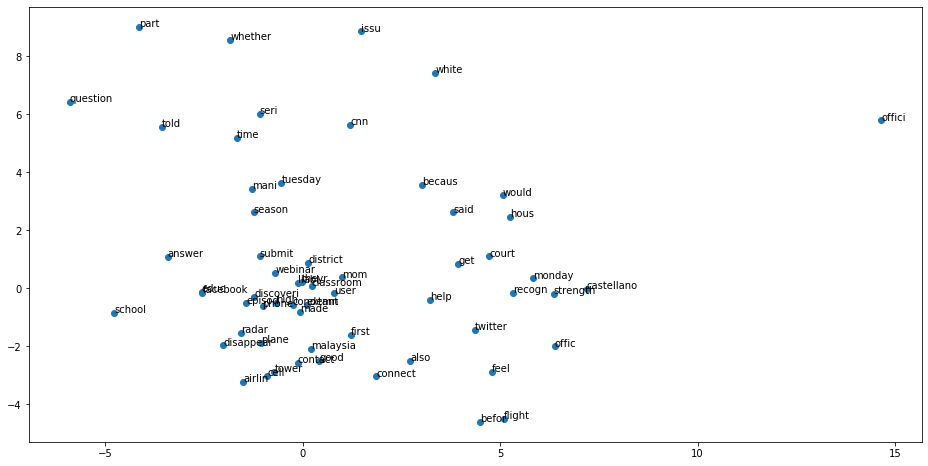

In [95]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pyplot.figure(figsize=(16,8))

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection of first 60 
pyplot.scatter(result[:60, 0], result[:60, 1], )
words = list(model.wv.vocab)[:60]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [73]:
def replace_string(text):
    return text.replace('[' ,"").replace(']',"").replace("'", "").split(", ")

In [77]:
Multi_Label_df["Label_list"] = Multi_Label_df["Labels"].apply(replace_string)

In [78]:
Multi_Label_df.head()

,Unnamed: 0,Texts,Labels,Processed_text,Label_list
0,0,its not just good for the moms theyre helping ...,"['Social', 'investigate', 'Enterprise']",good mom theyr help also good becaus get feel ...,"[Social, investigate, Enterprise]"
1,1,and on tuesday she will answer questions submi...,"['Social', 'investigate', 'Conventional']",tuesday answer question submit classroom part ...,"[Social, investigate, Conventional]"
2,2,what began as an experiment in making a public...,"['Social', 'Artistic', 'Enterprise']",began experi make public space share space bec...,"[Social, Artistic, Enterprise]"
3,3,he also said capitalism and the current world ...,"['Social', 'Artistic', 'Enterprise']",also said capit current world order reach demi...,"[Social, Artistic, Enterprise]"
4,4,the deadliest ebola outbreak in history contin...,"['Social', 'investigate', 'Artistic']",deadliest ebola outbreak histori continu plagu...,"[Social, investigate, Artistic]"


In [86]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Labels_one_hot = pd.DataFrame(mlb.fit_transform((Multi_Label_df.Label_list.values)),
                   columns=mlb.classes_)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
X_train, X_test, y_train, y_test = train_test_split(Multi_Label_df.Processed_text.values, Labels_one_hot.values, test_size=0.33, random_state=42)

In [97]:
X_train.shape, y_train.shape

((80400,), (80400, 6))

In [98]:
X_test.shape, y_test.shape

((39600,), (39600, 6))

In [102]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

trained_vectorizer = vectorizer.fit_transform(X_train)

In [109]:
trained_vectorizer

<80400x201018 sparse matrix of type '<class 'numpy.float64'>'
	with 11882494 stored elements in Compressed Sparse Row format>

In [115]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier

bagClassifier = OneVsRestClassifier(BaggingClassifier(n_jobs=-1))
bagClassifier.fit(trained_vectorizer, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(n_jobs=-1))

In [116]:
import pickle
pickle.dump(bagClassifier, open("Assignment_problem_bagClassifier.pkl", "wb"), )

In [123]:
bagClassifier.predict_proba(vectorizer.transform(X_test[0]))

array([[0. , 1. , 1. , 0. , 0.9, 0. ],
       [1. , 0. , 1. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. , 1. , 1. ],
       [1. , 0. , 1. , 0. , 0.8, 0. ],
       [0. , 1. , 1. , 1. , 0. , 0. ]])

In [183]:
random_sentences = Topic_df.sample(100)["Sentence"].values
type(random_sentences)

numpy.ndarray

In [180]:
def predict_proba(texts):
    df = {"Data": [], Labels_one_hot.columns[0] : [], Labels_one_hot.columns[1] : [],
         Labels_one_hot.columns[2] : [], Labels_one_hot.columns[3] : [], Labels_one_hot.columns[4] : [],
         Labels_one_hot.columns[5] : []}
    for text_ in texts:
        
        df["Data"].append(text_)
        processed_text = processing_text(text_)
        proba = bagClassifier.predict_proba(vectorizer.transform([processed_text]))
        df[Labels_one_hot.columns[0]].append(proba[0][0])
        df[Labels_one_hot.columns[1]].append(proba[0][1])
        df[Labels_one_hot.columns[2]].append(proba[0][2])
        df[Labels_one_hot.columns[3]].append(proba[0][3])
        df[Labels_one_hot.columns[4]].append(proba[0][4])
        df[Labels_one_hot.columns[5]].append(proba[0][5])
#         print(df)
    return pd.DataFrame(df)

In [185]:
final_df = predict_proba(random_sentences)
final_df.head()

,Data,Artistic,Conventional,Enterprise,Realistic,Social,investigate
0,former navy lawyer charles swift who won a lan...,0.0,0.0,1.0,0.1,0.0,0.0
1,taylor is not the first basketball player to g...,0.0,0.0,0.0,0.1,0.0,0.0
2,lightman and his colleague dr gillian foster p...,0.0,0.0,1.0,0.0,0.0,0.0
3,harvey is authorized to publish this order for...,0.0,0.0,1.0,0.0,1.0,0.0
4,from there shortterm we may see more pricecutt...,0.5,0.0,0.0,0.0,0.5,0.0


In [187]:
final_df.to_csv("Assignment_Problem_final_output.csv")

In [ ]:
predict_proba[]

### This Notebook will be more impressive if we trained the model with whole dataset. 
### I trained it with few number of instances. 

In [190]:
pd.read_csv("Assignment_Problem_first_output.csv").head()

,Unnamed: 0,Artistic,Conventional,Enterprise,Realistic,Social,investigate
0,0,it cost more than for the business development...,the kansas city employee who started his job i...,its official us president barack obama wants l...,obama said top congressional leaders had agree...,un inspectors leave syria,transcript read obamas full remarks
1,1,klumb called the gsas teleworking program a su...,montano was arrested thursday evening in san p...,obama sent a letter to the heads of the house ...,obama decision came friday night,it needs time to be able to analyze the inform...,in numerous instances the cars were parked in ...
2,2,dan tangherlini who was appointed acting gsa a...,thousands on saturday fled the area in southwe...,the proposed legislation from obama asks congr...,more than legislators including of obamas fell...,bergen syria is a problem from hell for the us,four other teenage suspects were arraigned thu...
3,3,the gsa virtual employee program is different ...,humanitarian organizations reported saturday t...,its a step that is set to turn an internationa...,their quartet recorded a championship record o...,map us and allied assets around syria,ive been out here for a little while and know ...
4,4,the american people have a right to know that ...,faa delays closures of control towers,there are key questions looming over the debat...,republican arizona gov jan brewer signed the l...,what will happen if they vote no,grammy awardwinning colombian singer shakira i...


In [191]:
Multi_Label_df[["Texts", "Label_list"]]

,Texts,Label_list
0,its not just good for the moms theyre helping ...,"[Social, investigate, Enterprise]"
1,and on tuesday she will answer questions submi...,"[Social, investigate, Conventional]"
2,what began as an experiment in making a public...,"[Social, Artistic, Enterprise]"
3,he also said capitalism and the current world ...,"[Social, Artistic, Enterprise]"
4,the deadliest ebola outbreak in history contin...,"[Social, investigate, Artistic]"
...,...,...
119995,brandon dorsey a spokesman for the group told ...,"[Social, investigate, Realistic]"
119996,ever wanted your own dinosaur a rare diplodocu...,"[Social, Enterprise, Realistic]"
119997,its a revolutionary decree in the midst of the...,"[Social, Enterprise, Conventional]"
119998,democrats picked up three seats in the electio...,"[investigate, Realistic, Conventional]"


In [194]:
pd.read_csv("Assignment_Problem_final_output.csv").head()

,Unnamed: 0,Data,Artistic,Conventional,Enterprise,Realistic,Social,investigate
0,0,former navy lawyer charles swift who won a lan...,0.0,0.0,1.0,0.1,0.0,0.0
1,1,taylor is not the first basketball player to g...,0.0,0.0,0.0,0.1,0.0,0.0
2,2,lightman and his colleague dr gillian foster p...,0.0,0.0,1.0,0.0,0.0,0.0
3,3,harvey is authorized to publish this order for...,0.0,0.0,1.0,0.0,1.0,0.0
4,4,from there shortterm we may see more pricecutt...,0.5,0.0,0.0,0.0,0.5,0.0
